# Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from imblearn.over_sampling import RandomOverSampler
import xgboost
import lightgbm as lgb
from sklearn import metrics 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV

# Dataset Loading

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Columns description

- customer_id: a unique identifier for each customer, but is not used as an input or feature in the model.

- credit_score: used as an input in the model, represents the credit worthiness of the customer.

- country: used as an input in the model, represents the country where the customer resides.

- gender: used as an input in the model, represents the gender of the customer.

- age: used as an input in the model, represents the age of the customer.

- tenure: used as an input in the model, represents the length of time the customer has been a bank customer.

- balance: used as an input in the model, represents the current balance in the customer's bank account.

- products_number: used as an input in the model, represents the number of products the customer has with the bank.

- credit_card: used as an input in the model, represents whether the customer has a credit card with the bank.

- active_member: used as an input in the model, represents whether the customer is an active member of the bank.

- estimated_salary: used as an input in the model, represents the estimated salary of the customer.

- churn: used as the target or label in the model, represents whether the customer has left the bank during some period or not. A value of 1 means the customer has left, and a value of 0 means the customer has not left.

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Understanding the data

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(10000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [10]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [13]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [14]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [15]:
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [16]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [17]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [18]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [19]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

# Exploratory Data Analysis and Visualization

<AxesSubplot:>

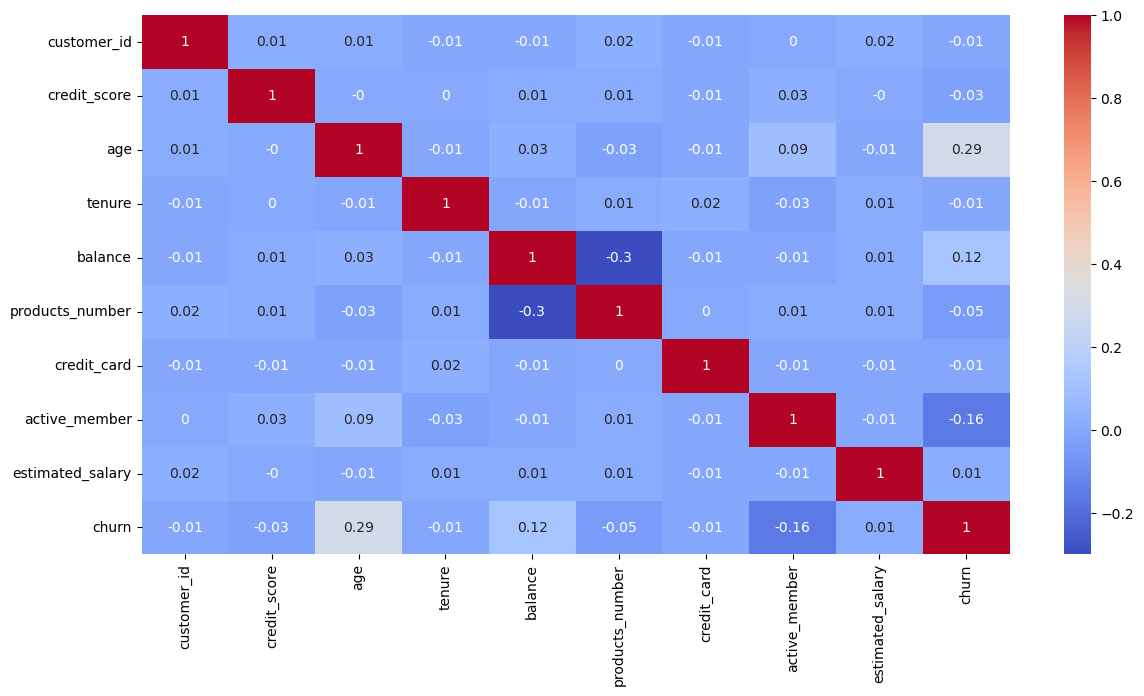

In [20]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')


Here i have shown the result of this code in a heatmap visualization of the correlation matrix

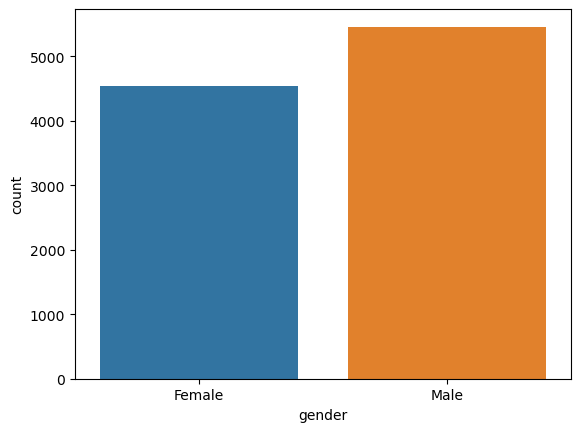

In [21]:
sns.countplot(x='gender', data=df)
plt.show()


Here I have shown the gender where you can see that the number of male is more than number of female

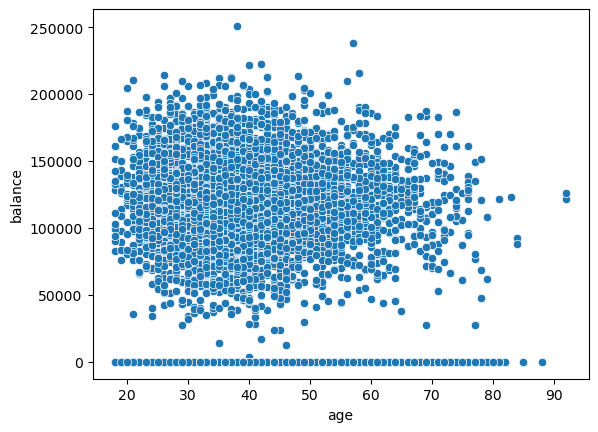

In [22]:
sns.scatterplot(x='age', y='balance', data=df)
plt.show()


The above scatterplot visualizes the relationship between the age and balance columns of the data.

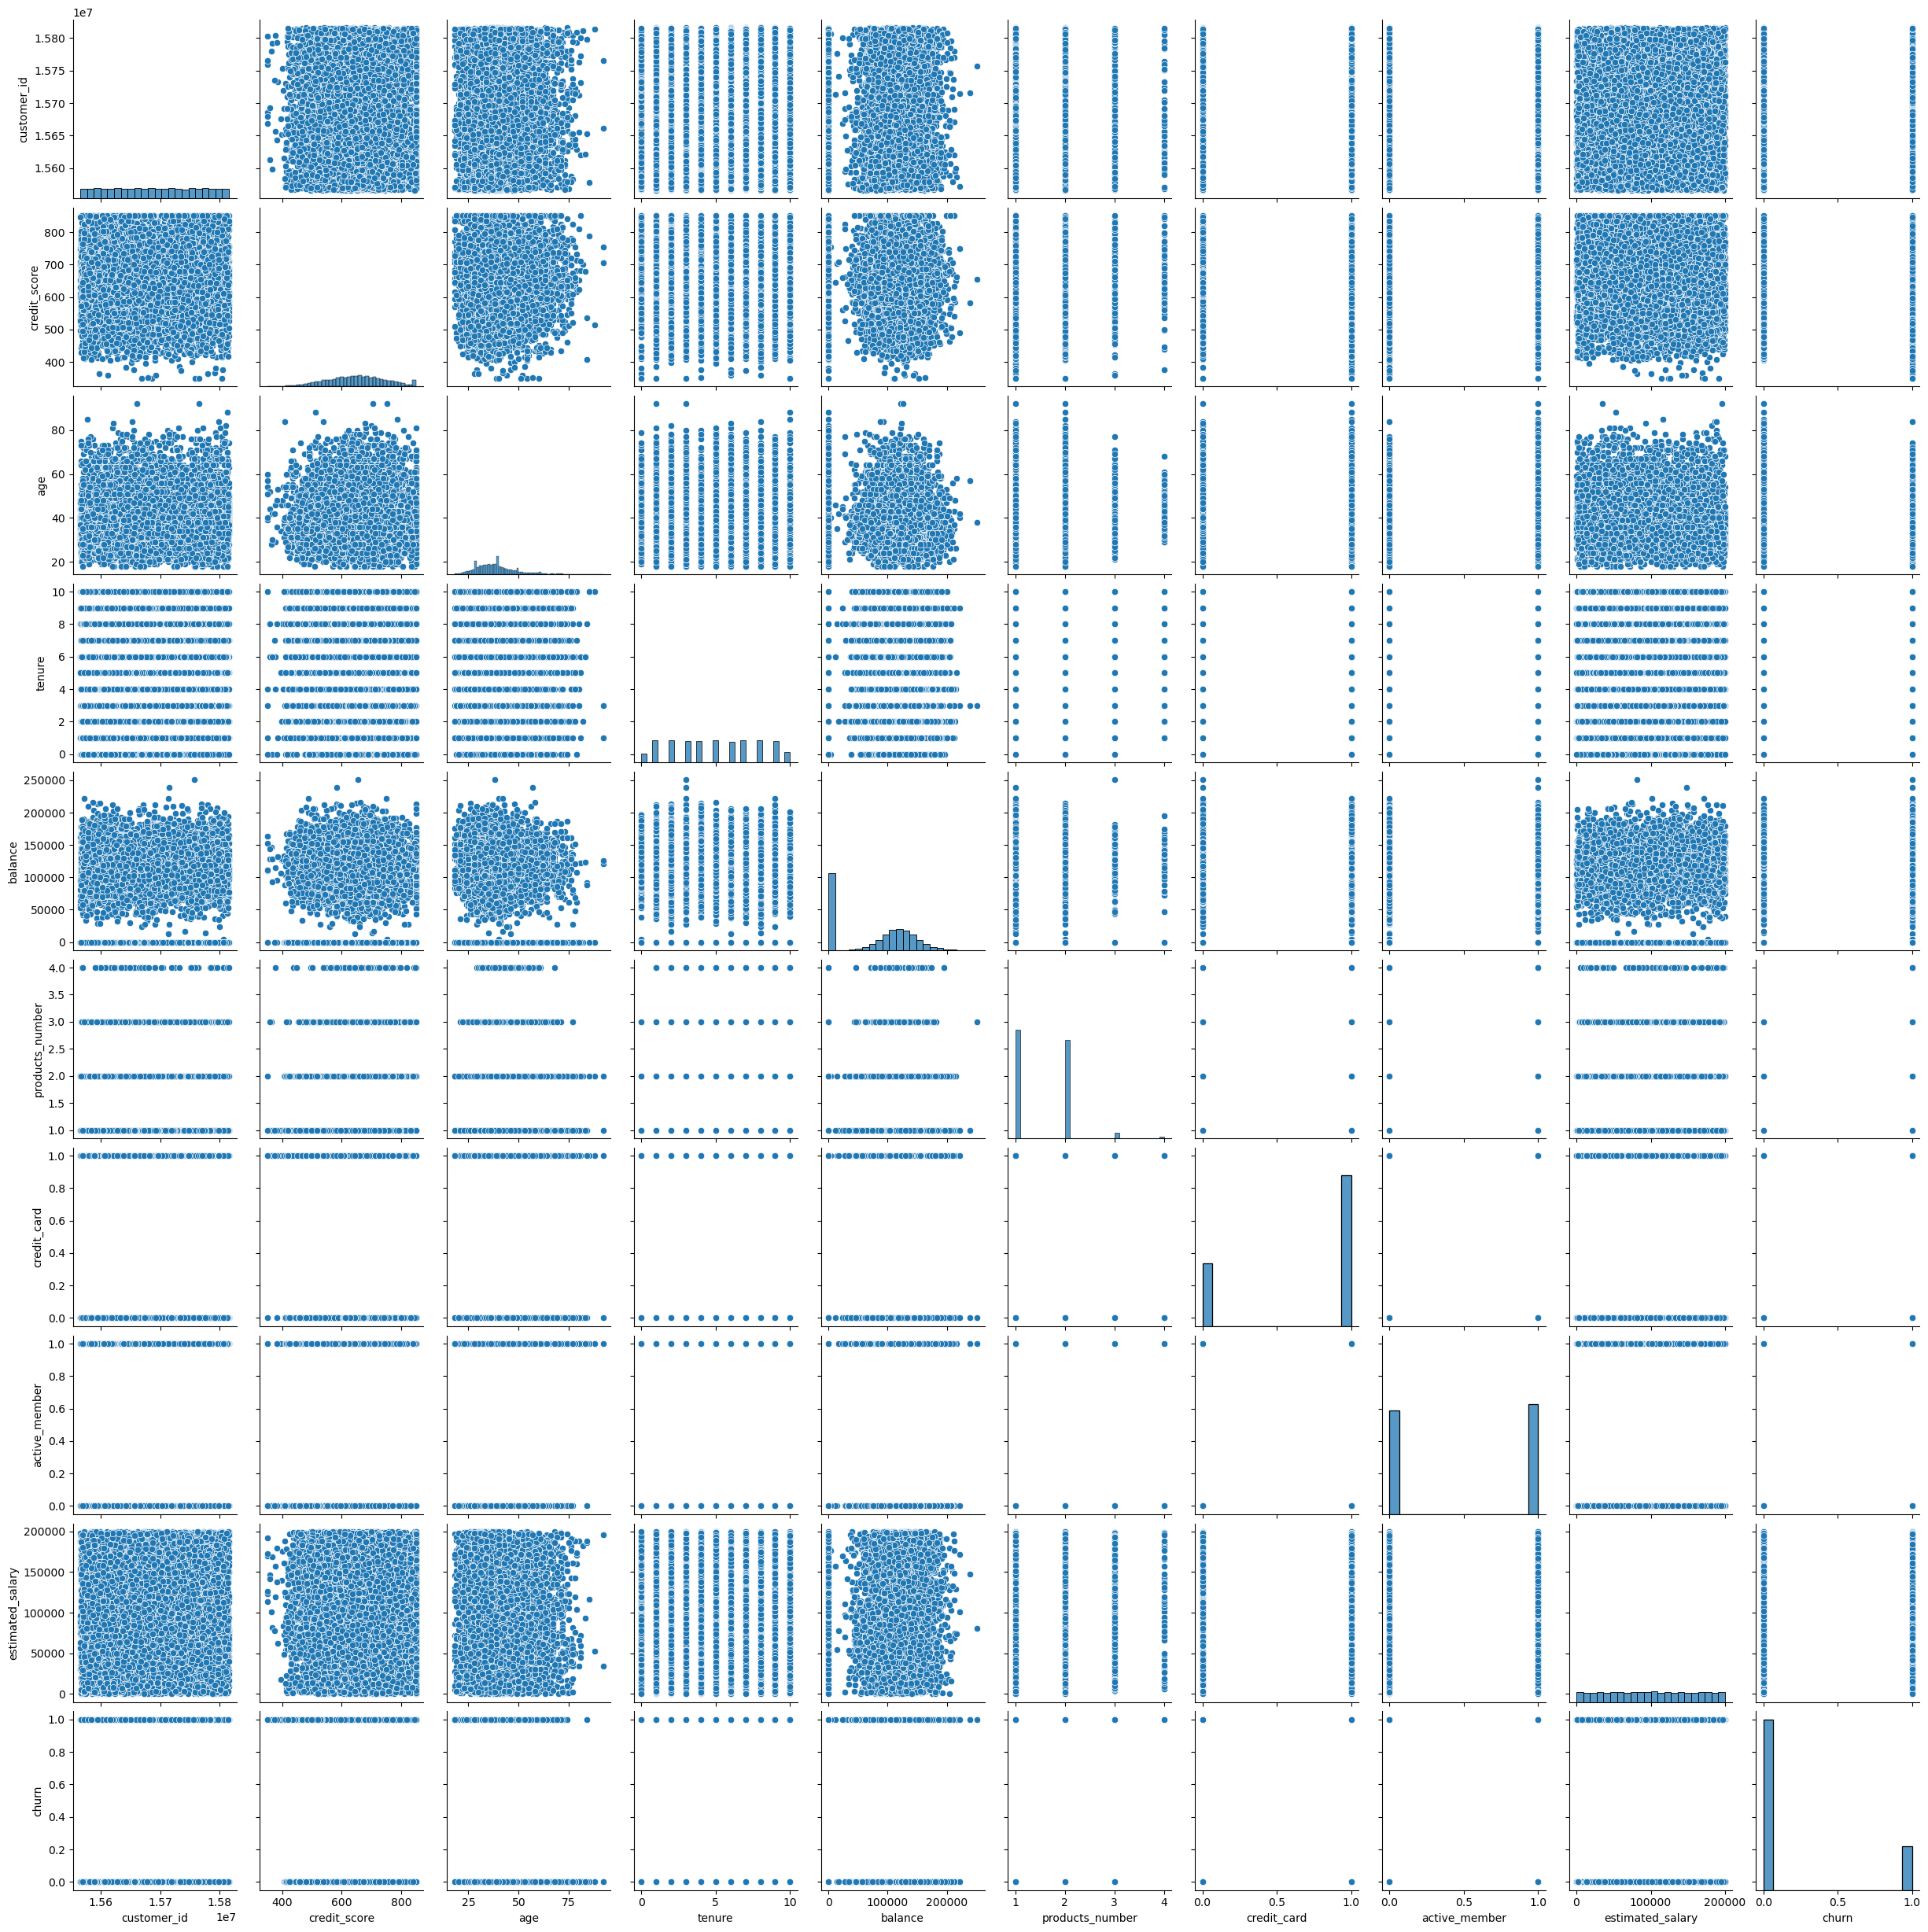

In [23]:
sns.pairplot(df)
plt.show()


Here I have shown the scatter plot matrix in which i have shown the  type of visualization that plots each pair of variables against each other in a grid-like format. It provides a way to visualize relationships between multiple variables in a dataset. 

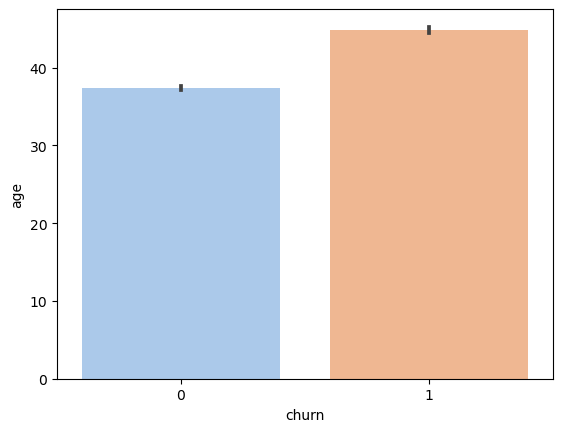

In [24]:
sns.barplot(x='churn', y='age', data=df, palette='pastel')
plt.show()


Here I have shown a barplot of age and churn.
Examining the age variable, it appears that individuals who are older tend to be more likely to churn. 

<AxesSubplot:xlabel='churn', ylabel='count'>

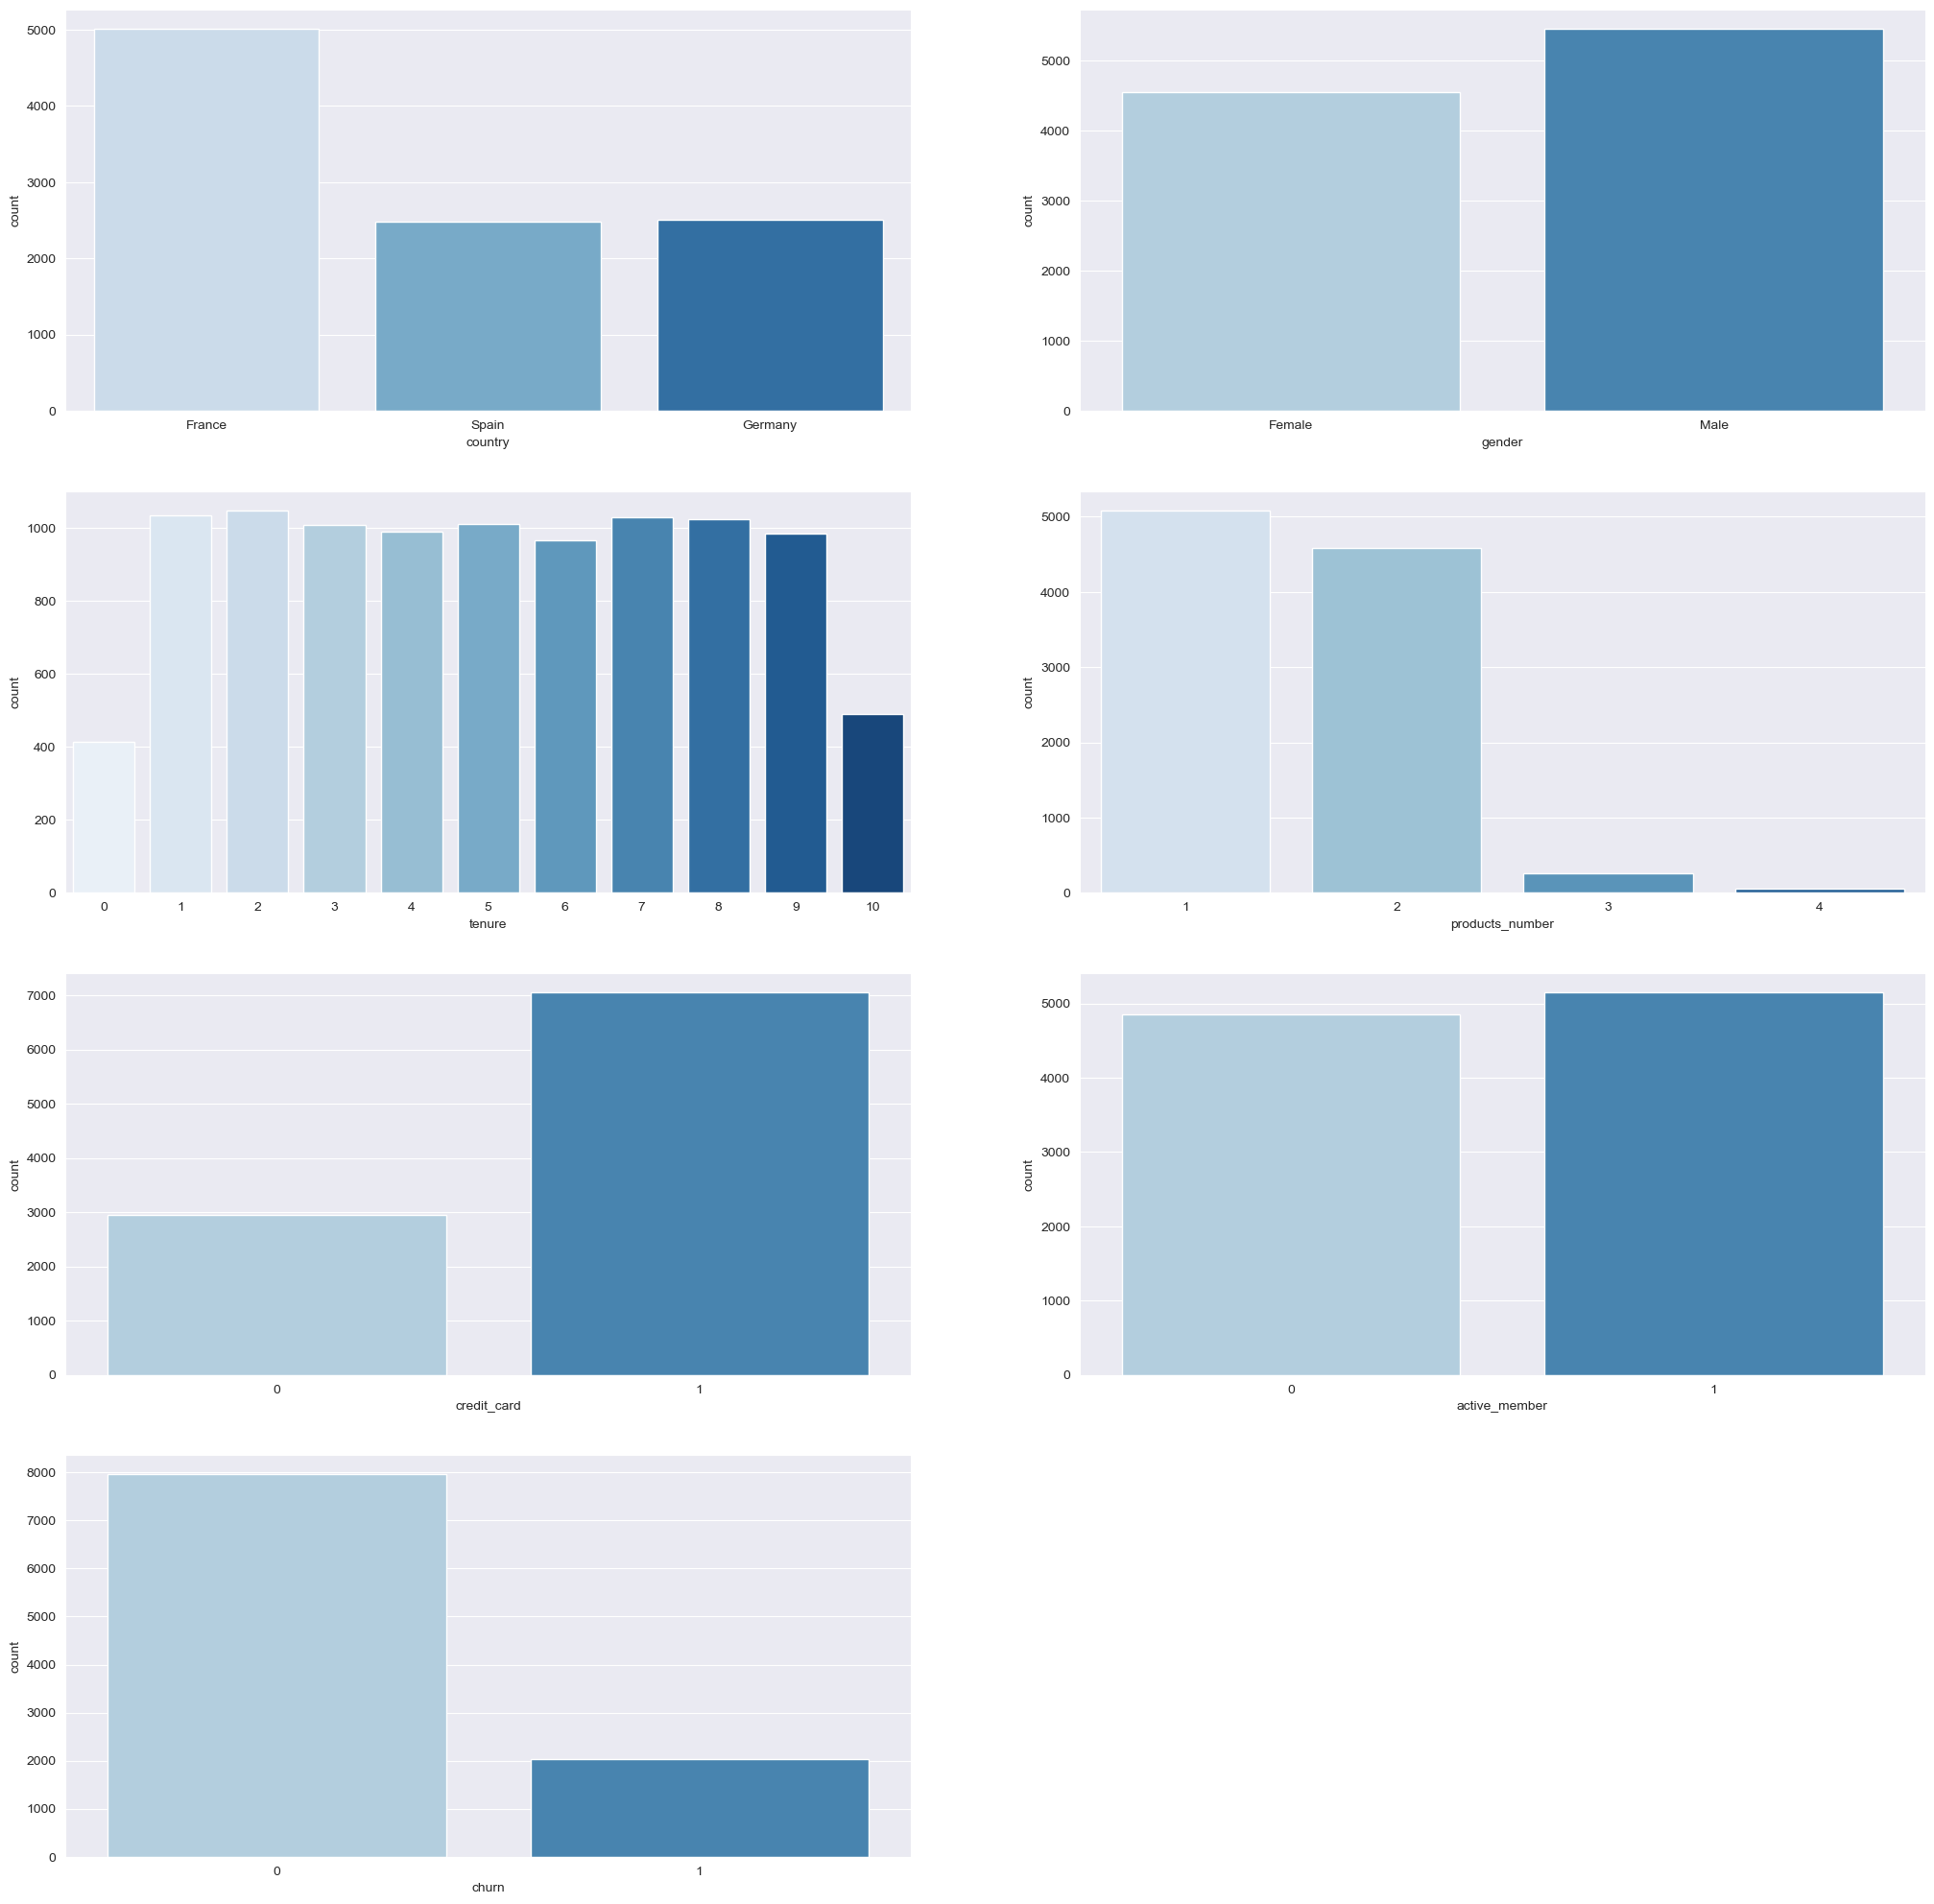

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Blues', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Blues', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Blues', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Blues', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Blues', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Blues', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Blues', data = df)


Looking at each of our categorical variables separately, we were able to confirm that our base has a predominance of French population, that there are slightly more men than women, that tenure has a good distribution taking the values 0 and 10, that product number has a predominance in products 1 and 2, that the majority of transactions are made by credit card, and that most transactions are made online.

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

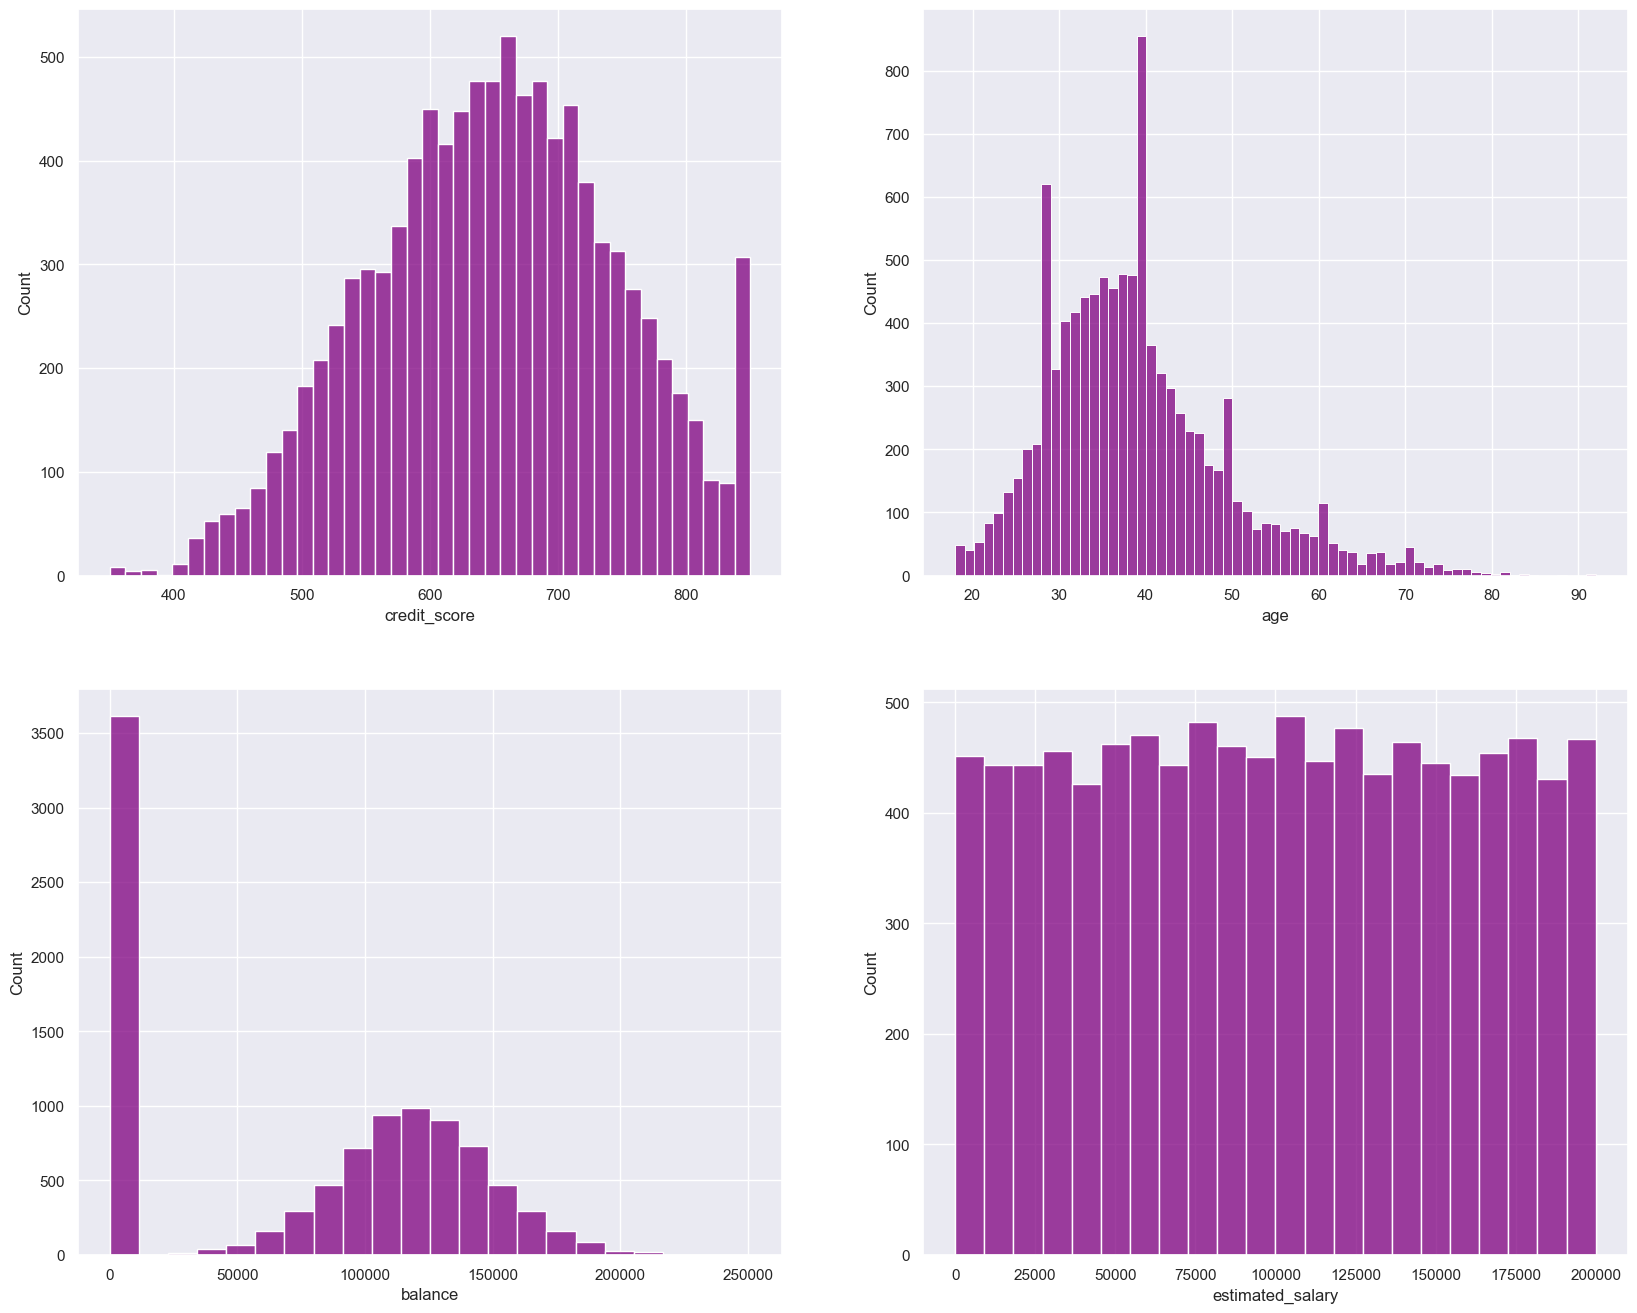

In [26]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)
sns.set_style("darkgrid")

plt.subplot(3,2,1)
sns.histplot(df['credit_score'], color="purple")

plt.subplot(3,2,2)
sns.histplot(df['age'], color="purple")

plt.subplot(3,2,3)
sns.histplot(df['balance'], kde = False, color="purple")

plt.subplot(3,2,4)
sns.histplot(df['estimated_salary'], kde = False, color="purple")


Examining the categorical variables, we observe that the credit score variable has a distribution that is almost normal, with a majority of individuals in our dataset ranging from 20 to 40 years old. A significant portion of people in the data have a blank balance, and the salary variable has values that are evenly spread out.

<AxesSubplot:xlabel='churn', ylabel='count'>

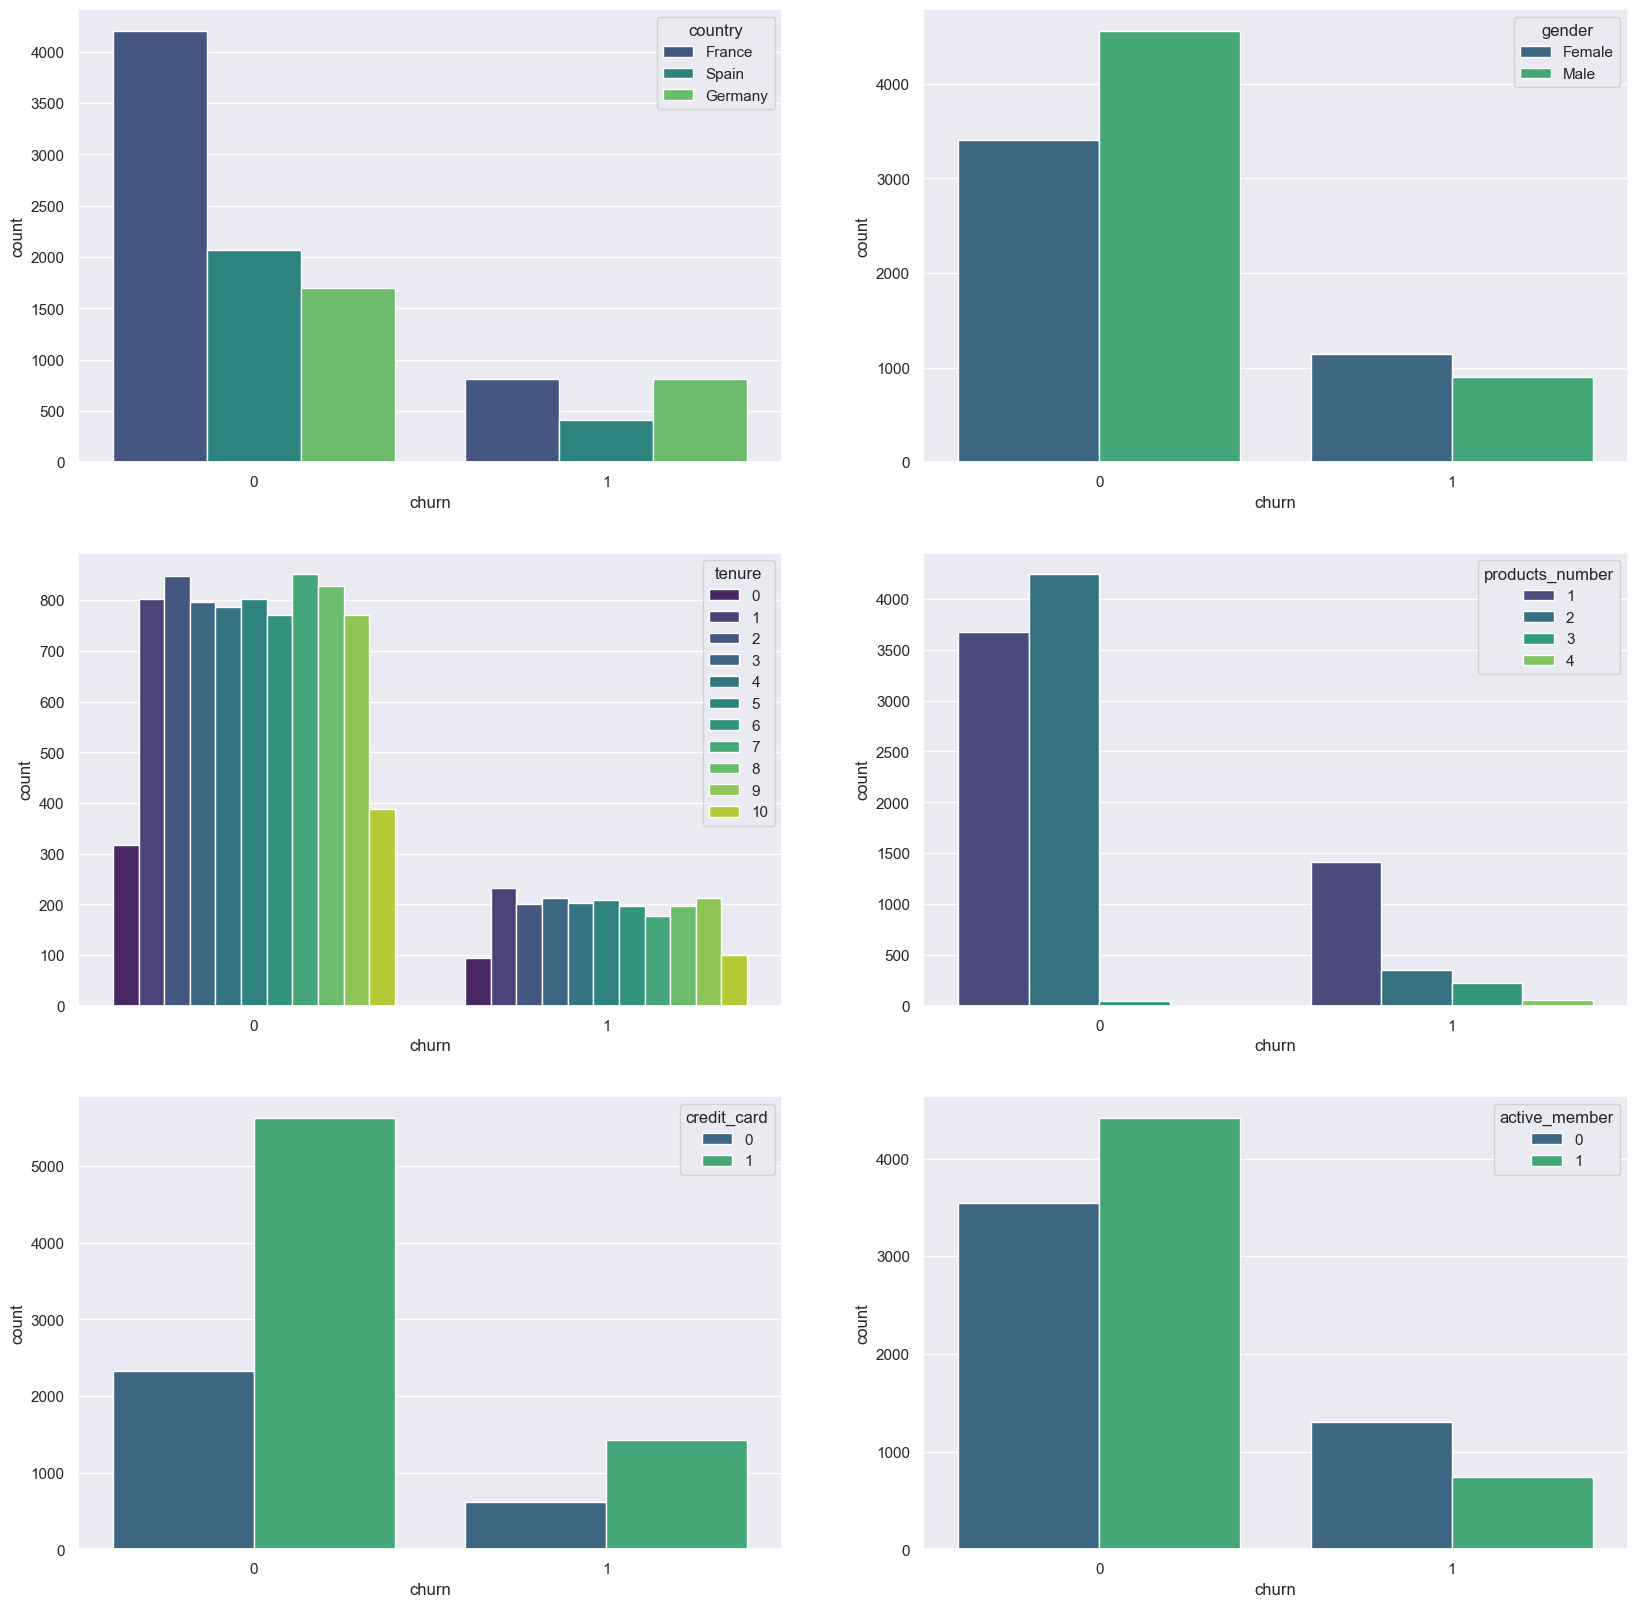

In [27]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.countplot(x='churn', hue='country', palette='viridis', data=df)

plt.subplot(3, 2, 2)
sns.countplot(x='churn', hue='gender', palette='viridis', data=df)

plt.subplot(3, 2, 3)
sns.countplot(x='churn', hue='tenure', palette='viridis', data=df)

plt.subplot(3, 2, 4)
sns.countplot(x='churn', hue='products_number', palette='viridis', data=df)

plt.subplot(3, 2, 5)
sns.countplot(x='churn', hue='credit_card', palette='viridis', data=df)

plt.subplot(3, 2, 6)
sns.countplot(x='churn', hue='active_member', palette='viridis', data=df)


We were able to learn a few things from our bivariate analysis: men and women experience churn rates that are evenly distributed, and the other variables are likewise evenly distributed. Product 2 does not typically have a churn problem despite having a large number of samples.

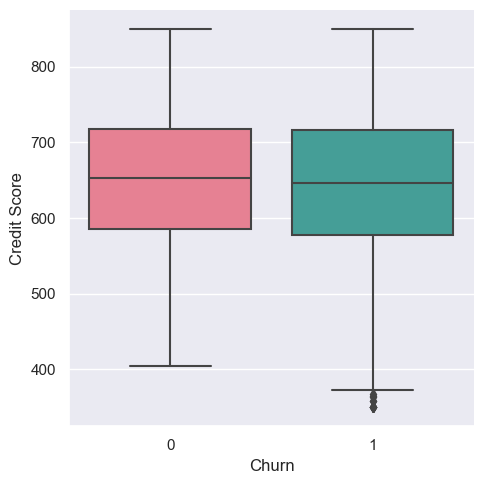

In [28]:
g = sns.catplot(x = 'churn', y="credit_score", kind="box", data = df, palette='husl')
g.set_axis_labels("Churn", "Credit Score")


Here one can see The analysis of the credit score variable does not seem to reveal any significant correlation with the likelihood of churn.

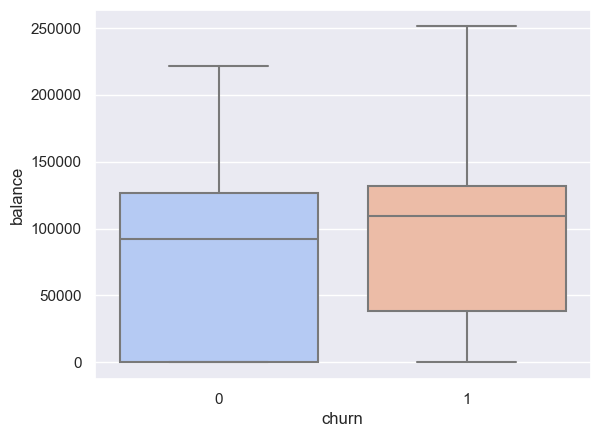

In [29]:
sns.boxplot(x='churn', y='balance', data=df, palette='coolwarm')
plt.show()


In here one can see that when analyzing the balance variable, there doesn't seem to be a clear correlation between balance and the likelihood of churn.

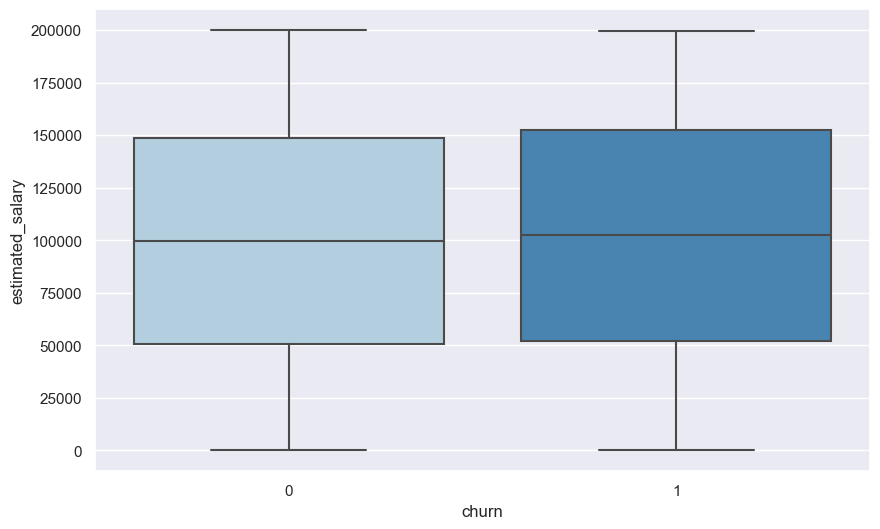

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='churn', y='estimated_salary', data=df, palette='Blues')
plt.show()

It shows that there doesn't appear to be a strong relationship between estimated salary and the likelihood of churn.

# Data Preprocessing

In [31]:
df_dummies = pd.get_dummies(df, drop_first=True)
display(df_dummies.head())

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [32]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_Germany   10000 non-null  uint8  
 11  country_Spain     10000 non-null  uint8  
 12  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [33]:
X = df_dummies.drop(['churn'], axis = 1)
y = df_dummies['churn']

# Training and testing the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


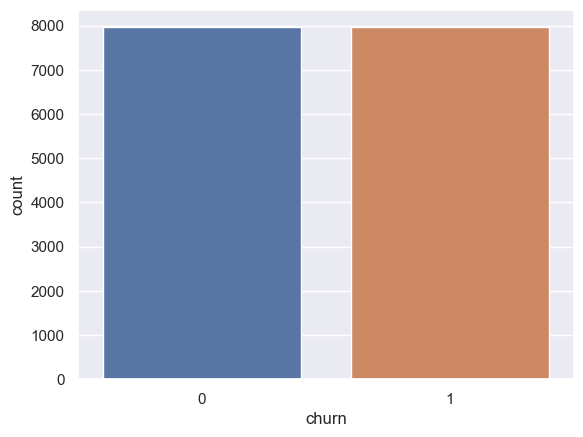

In [36]:
ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

ax = sns.countplot(x=y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12740, 12) (3186, 12) (12740,) (3186,)


# Model performance

In [39]:
lgbm = lgb.LGBMClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8584431889516635


In [40]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1593
           1       0.85      0.87      0.86      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [41]:
model = xgboost.XGBClassifier()
model.fit(X_train,y_train)
accuracy_score(model.predict(X_test),y_test)

0.8967357187696171

In [42]:
xgb = xgboost.XGBClassifier()

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1593
           1       0.88      0.92      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



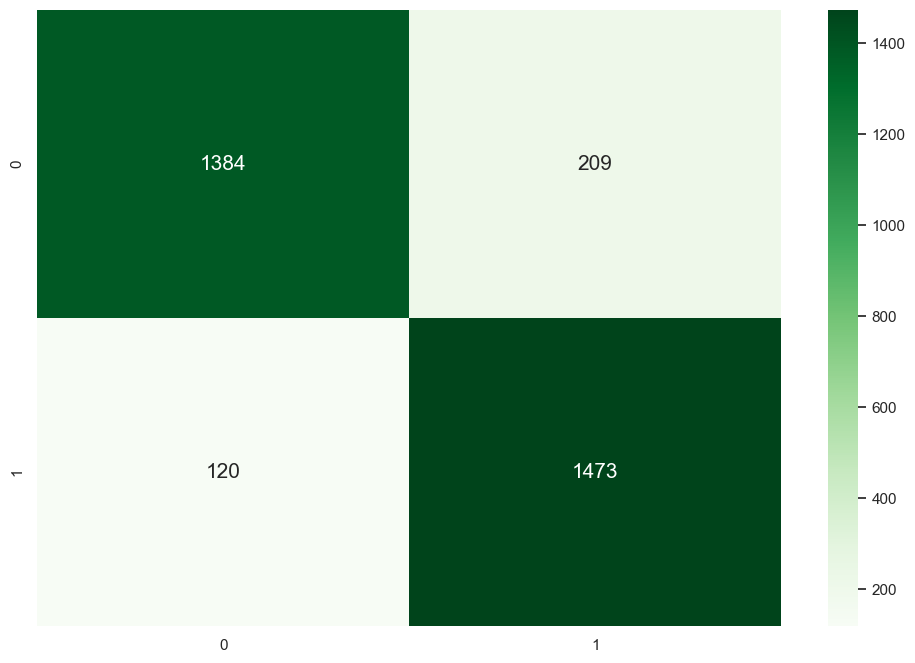

In [43]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_test_pred = xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_pred)

plt.subplots(figsize=(12, 8))
sns.heatmap(cf_matrix, cmap='Greens', annot=True, annot_kws={'size': 15}, fmt='d')
plt.show()


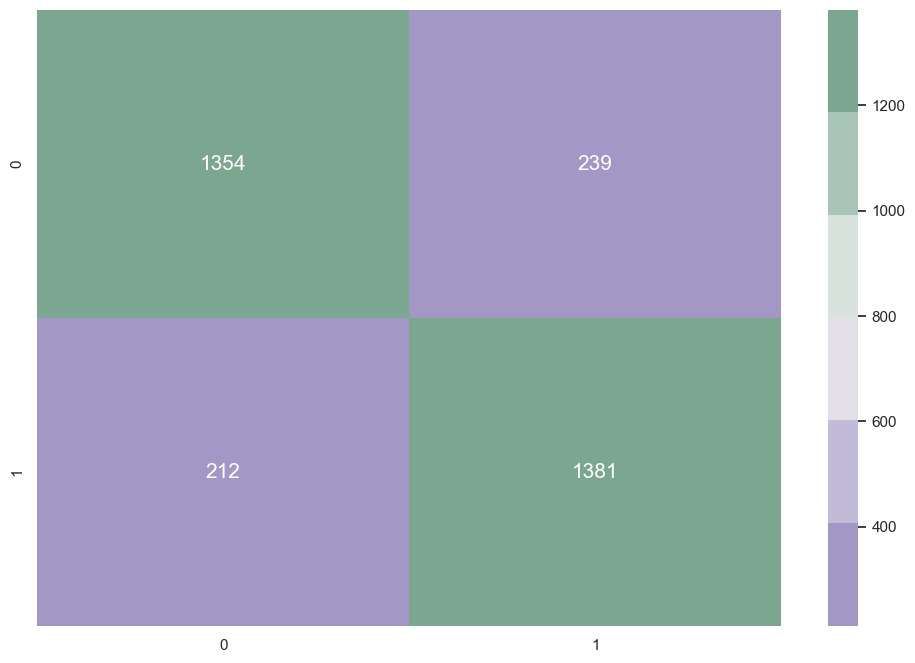

In [44]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_test_pred = lgbm.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_pred)

cmap1 = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(12, 8))
sns.heatmap(cf_matrix, cmap=cmap1, annot=True, fmt='d', annot_kws={'size': 15})
plt.show()


# ROC and AUC Curve

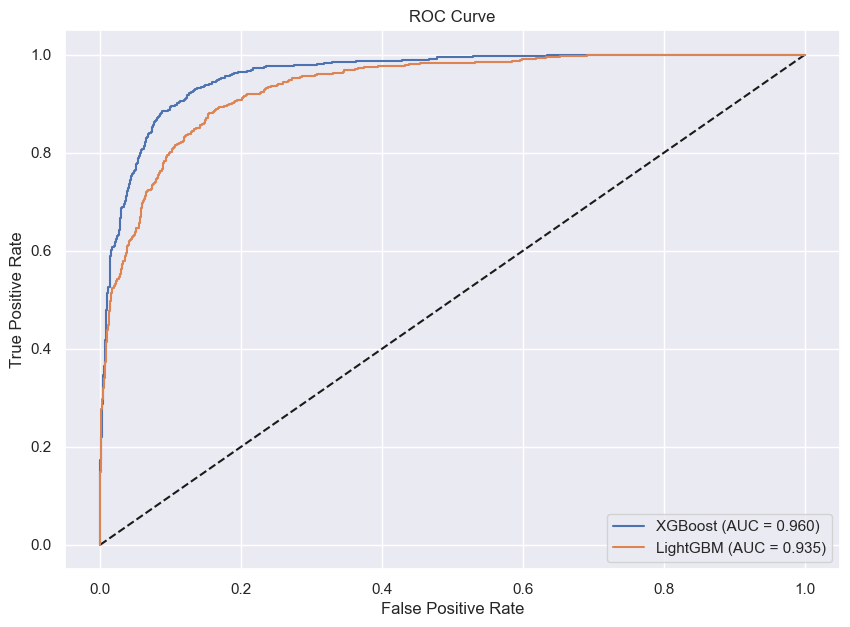

In [45]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict_proba(X_test)[:,1]
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_lgb)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.3f})'.format(auc_xgb))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM (AUC = {:.3f})'.format(auc_lgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


#  RandomizedSearchCV 

In [46]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf = RandomizedSearchCV(xgb,param_distributions=params,n_iter=10,scoring='f1',cv=5,verbose=3, random_state=42)
clf.fit(X_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.932 total time=   0.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.927 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.932 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.925 total time=   1.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.937 total time=   1.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.922 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1;, score=0.933 total time=   0.7s
[CV 3/5] END colsamp

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [47]:
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [48]:
xgb = xgboost.XGBClassifier(min_child_weight = 1,
max_depth = 15,
learning_rate = 0.1,
gamma = 0.4,
colsample_bytree = 0.5)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1593
           1       0.93      0.98      0.95      1593

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186

Accuracy: 0.9485247959824231


# Conclusion

In conclusion, the goal of the Bank Client Churn Prediction project was to foretell whether or not a customer will quit the bank. The bank may take action based on this information to keep clients and keep them from leaving, which is valuable. Two machine learning methods, XGBoost and LightGBM, were used to achieve this aim.
These factors lead to the conclusion that the XGBoost model was the best choice for this project.